## PROJECT 1
Tasks:

1. Load the dataset into a pandas DataFrame.*  
2. Perform basic data exploration: check the first few rows, column data types, and any missing values.  
3. Calculate the total revenue (Total) for each category.  
4. Find the most sold product (based on quantity).  
5. Determine the daily revenue trend.  
6. Visualize sales trends using a line chart for daily revenue.  

In [32]:
import pandas as pd
sales=pd.read_csv("./data/sales.csv")
sales["revenue"]=sales[' Price'] * sales[' Quantity']
sales.rename(columns={"revenue":"Revenue"},inplace=True)

sales["Date"]=pd.to_datetime(sales['Date'])
sales.groupby('Date')['Revenue'].sum().reset_index()

,Date,Revenue
0,2024-01-01,2400
1,2024-01-02,900
2,2024-01-03,1350


In [33]:
sales

,Date,Product,Category,Price,Quantity,Total,Revenue
0,2024-01-01,Laptop,Electronics,1200,2,2400,2400
1,2024-01-02,Smartphone,Electronics,800,1,800,800
2,2024-01-02,T-Shirt,Apparel,20,5,100,100
3,2024-01-03,Laptop,Electronics,1200,1,1200,1200
4,2024-01-03,Shoes,Apparel,50,3,150,150


In [126]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


        Date  Revenue
0 2024-01-01     2400
1 2024-01-02      900
2 2024-01-03     1350


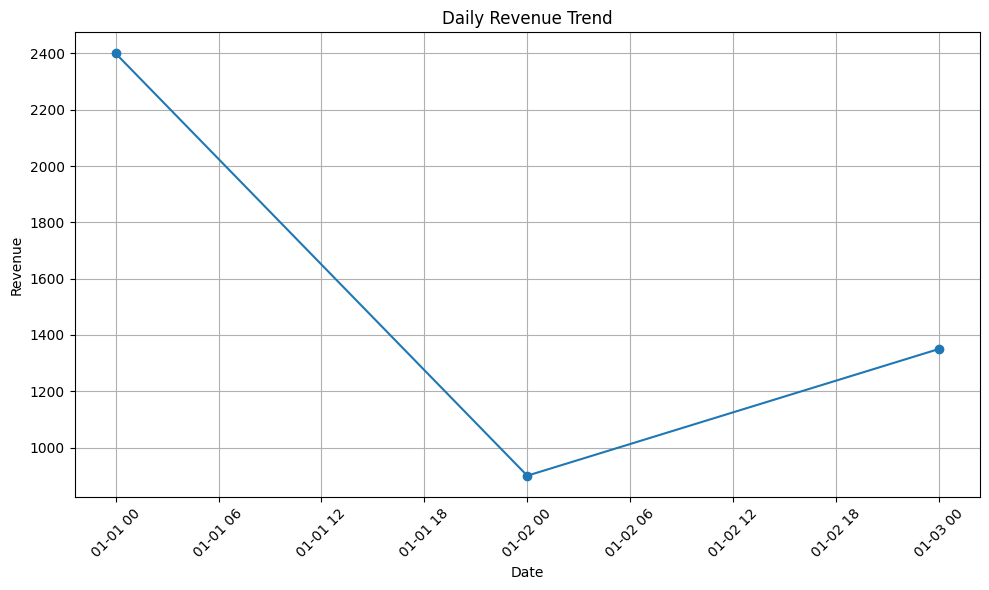

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
sales = pd.read_csv("./data/sales.csv")

# Ensure there are no spaces in column names (you can use .columns to check)
sales.columns = sales.columns.str.strip()  # Remove extra spaces

# Calculate revenue for each transaction
sales["Revenue"] = sales['Price'] * sales['Quantity']

# Convert 'Date' column to datetime format
sales["Date"] = pd.to_datetime(sales['Date'])

# Calculate total revenue for each date (group by Date)
daily_revenue = sales.groupby('Date')['Revenue'].sum().reset_index()

# Print the daily revenue
print(daily_revenue)

# Optional: Plot the daily revenue trend

plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## PROJECT 2
Tasks:

1.Load the Dataset:
    Import the dataset into a pandas DataFrame for analysis.
    
2.Perform Data Exploration:
    Display the first few rows of the dataset to understand its structure.
    Check for missing values or data inconsistencies.*
    
3.Calculate Total Revenue for Each Category:
    Group the data by Category and calculate the total revenue for each category.*

4.Identify the Top 5 Products:
    Group the data by Product and calculate the total revenue for each product.
    Identify the top 5 products that generated the highest revenue.

5.Analyze the Monthly Revenue Trend:
    Convert the Date column into a monthly period.
    Calculate the total revenue for each month to analyze trends over time.

6.Visualize the Monthly Revenue Trend:
    Use a line chart to visualize the revenue trends over months and observe any seasonal or increasing/decreasing patterns.

In [ ]:
import pandas as pd
sales_large=pd.read_csv("./data/sales_dataset_large.csv")

# check for any nan value
#sales_large[['Date', 'Product', 'Category', 'Quantity', 'CustomerID', 'Price',
       #'Revenue']].isna().any(axis=1)
sales_large.isnull().values.any()

sales_large[sales_large["Category"] == "Apparel"][["Revenue"]].sum()


sales_large[sales_large["Category"] == "Electronics"][["Revenue"]].sum()

sales_large[['Product']].sample(10)
sales_large.drop_duplicates(subset='Product')["Product"]

shoes=sales_large[sales_large["Product"] == "Shoes"][["Revenue"]].sum()
laptop=sales_large[sales_large["Product"] == "Laptop"][["Revenue"]].sum()
smartphone=sales_large[sales_large["Product"] == "Smartphone"][["Revenue"]].sum()
tshirt=sales_large[sales_large["Product"] == "T-Shirt"][["Revenue"]].sum()
tablet=sales_large[sales_large["Product"] == "Tablet"][["Revenue"]].sum()




sales_large['Revenue'].max()
sales_large[["Product","Revenue"]].max()

sales_large[(sales_large["Revenue"] >= 10200) & (sales_large["Product"] >= "Laptop")]#[["Product","Revenue"]].sample(200)
sales_large                                                                  

## top product

highest_product=pd.DataFrame([laptop,tablet,shoes,smartphone,tshirt],
                          index=['laptop', 'tablet', 'shoes', 'smartphone', 'tshirt'])
highest_product.idxmax()


## monthly revenue

In [24]:
sales_large["Date"]=pd.to_datetime(sales_large["Date"])
sales_large["monthly revenue"]=sales_large['Date'].dt.to_period("M")
sales_large.groupby('monthly revenue')['Revenue'].sum().reset_index()
 # so icant realy add this to the data set because of its length

,monthly revenue,Revenue
0,2024-01,70220
1,2024-02,64300
2,2024-03,80890
3,2024-04,104120
4,2024-05,87440
5,2024-06,84570
6,2024-07,91570
7,2024-08,67590
8,2024-09,71980
9,2024-10,103970


In [25]:
sales_large.drop(columns="monthly revenue",inplace=True)

In [26]:
sales_large

,Date,Product,Category,Quantity,CustomerID,Price,Revenue
0,2025-11-15,Shoes,Apparel,2,1947,50,100
1,2025-07-13,T-Shirt,Apparel,5,1285,20,100
2,2025-09-21,Laptop,Apparel,8,1167,1200,9600
3,2024-07-11,Shoes,Electronics,7,1425,50,350
4,2026-04-15,Smartphone,Apparel,5,1788,800,4000
...,...,...,...,...,...,...,...
995,2026-07-04,T-Shirt,Electronics,7,1820,20,140
996,2024-06-11,T-Shirt,Apparel,8,1598,20,160
997,2024-02-20,Tablet,Electronics,9,1091,500,4500
998,2024-08-30,Tablet,Apparel,2,1195,500,1000


## project 3
Primary Objectives
1. Understand Movie Trends:
   - Explore trends in movie releases across decades or years.
   - Identify which genres are most popular and how they've evolved over time.

2. Evaluate Movie Success:
   - Analyze which movies performed well based on ratings, votes, and revenue.
   - Determine whether there's a correlation between movie ratings and revenue.

3. Genre-Based Analysis:
   - Find the highest-rated genres and the ones with the most movies.
   - Understand how genre combinations impact ratings or revenue.

4. Time-Based Analysis:
   - Examine how ratings and revenue trends have changed over the years or decades.

5. Audience Preference:
   - Determine audience preferences by comparing votes and ratings across genres and time periods.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movie=pd.read_csv("./data/large_movies_data.csv")
movie.dropna()
movie['ReleaseDate']=pd.to_datetime(movie['ReleaseDate'])

movie['Year'] = movie['ReleaseDate'].dt.year
movie['Decade'] = (movie['Year'] // 10) * 10
movie_trend= movie.groupby("Decade")["Genre"].count()

movie['GenreList'] = movie['Genre'].str.split(', ')
all_genre = pd.Series([x for y in movie['GenreList'] for x in y ])

movie.explode("GenreList").groupby(["Decade","GenreList"]).size().unstack(fill_value=0)

GenreList,Action,Adventure,Animation,Comedy,Drama,Family,Romance,Sci-Fi,Thriller
Decade,,,,,,,,,
1980,95,106,91,102,98,103,94,86,94
1990,103,100,102,90,89,93,87,106,98
2000,103,107,102,106,94,114,117,107,106
2010,105,91,103,108,110,104,102,96,110
2020,38,53,44,40,59,54,47,54,51


In [ ]:
# Analyze which movies performed well based on ratings, votes, and revenue.
# Determine whether there's a correlation between movie ratings and revenue.

In [20]:
movie.head()

,MovieID,Title,Genre,ReleaseDate,Rating,Votes,Revenue (Million USD),Year,Decade,GenreList
0,1,Movie 1,"Drama, Action, Thriller",1997-04-08,6.5,529895,2046.3,1997,1990,"[Drama, Action, Thriller]"
1,2,Movie 2,"Drama, Adventure, Action",1981-02-07,6.8,211299,1705.7,1981,1980,"[Drama, Adventure, Action]"
2,3,Movie 3,"Family, Adventure, Drama",2008-10-09,8.8,127257,2288.5,2008,2000,"[Family, Adventure, Drama]"
3,4,Movie 4,Adventure,2001-05-05,6.8,1511779,351.5,2001,2000,[Adventure]
4,5,Movie 5,"Drama, Thriller",2002-10-09,8.8,2026967,1631.9,2002,2000,"[Drama, Thriller]"


In [26]:
movie[movie['Genre'] == "Adventure"][["Rating"]].sum()

Rating    579.7
dtype: float64

In [30]:
for x in movie.GenreList:
    

['Drama', 'Action', 'Thriller']
['Drama', 'Adventure', 'Action']
['Family', 'Adventure', 'Drama']
['Adventure']
['Drama', 'Thriller']
['Drama', 'Sci-Fi']
['Romance']
['Thriller', 'Comedy']
['Family']
['Action', 'Romance']
['Thriller', 'Romance', 'Family']
['Family', 'Sci-Fi', 'Thriller']
['Family']
['Adventure']
['Action', 'Drama', 'Thriller']
['Animation']
['Drama', 'Sci-Fi', 'Adventure']
['Family', 'Action', 'Sci-Fi']
['Romance', 'Action']
['Comedy', 'Family', 'Thriller']
['Romance', 'Sci-Fi', 'Family']
['Romance']
['Drama']
['Family']
['Animation', 'Romance', 'Adventure']
['Animation', 'Action']
['Romance']
['Romance', 'Drama']
['Romance']
['Adventure']
['Family', 'Animation', 'Drama']
['Action', 'Family']
['Drama', 'Comedy', 'Action']
['Romance', 'Action', 'Sci-Fi']
['Romance', 'Thriller']
['Action']
['Sci-Fi', 'Comedy', 'Animation']
['Sci-Fi', 'Action', 'Thriller']
['Family']
['Sci-Fi', 'Animation', 'Comedy']
['Comedy', 'Sci-Fi']
['Drama']
['Action']
['Romance']
['Comedy', 'Romanc